<p style="text-align: center;"><strong>MACHINE LEARNING</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>GRUPO 203008067_3</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>FASE 3 - COMPONENTE PRACTICO - PRACTICAS SIMULADAS</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO POR: DARWIN RAUL MERCADO DIAZ</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO A: EDGAR ANDRES VILLABON</strong></p>
<p style="text-align: center;"><br /> <br /> </p>
<p style="text-align: center;"><strong>UNIVERSIDAD ABIERTA Y A DISTANCIA UNAD</strong></p>
<p style="text-align: center;"><br /> <br /> <br /> </p>
<p style="text-align: center;"><strong>A&Ntilde;O 2023 II PERIODO 16-04</strong></p>
<p style="text-align: center;">&nbsp;</p>

# **Ejercicio número 1**

**Acción 1: Predicción con K-NN.**

- Cada estudiante debe construir un modelo de aprendizaje automático que pueda
aprender de las direcciones pertenecientes a los barrios donde se suspendió el
servicio de acueducto, para predecir el barrio donde habrá una nueva suspensión del
servicio de acueducto.


***A continuación se presenta el desarrollo del modelo solicitado por el docente.***

In [ ]:
# Librerías que se utilizarán de manera inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se realiza el cargue de los datos
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header = 1)
df.head()

,Impacto,Circuito,Servicio,Motivo,Solicita,Número de instalación,Municipio,Dirección,Nombre del responsable,Fecha y hora esperada,Inicio,Fin,Horas,Estado,Fecha de registro,Explicación,Barrio,Nombre del contratista,Tipo de aviso
0,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1242,Medellín,De CR96B hasta CR99B entre CL48DD y CL 49,Claudia Marcela Toro,12/17/2018 11:30:00 AM,12/17/2018 09:00:00 AM,12/17/2018 11:30:00 AM,2.50,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1242 | Motivo: Manten...,JUAN XXIII - LA QUIEBRA,EPM.,IVR
1,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,120,Medellín,De CR99B hasta CR100 entre CL48BB y CL 48D,Claudia Marcela Toro,12/17/2018 03:30:00 PM,12/17/2018 01:30:00 PM,12/17/2018 03:30:00 PM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 120 | Motivo: Manteni...,JUAN XXIII - LA QUIEBRA; EL SOCORRO,EPM.,Volantes
2,Bajo,Castilla-Bello,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1122,Bello,De CR57 hasta CR66B entre CL52 y CL 53,Claudia Marcela Toro,12/18/2018 11:00:00 AM,12/18/2018 09:00:00 AM,12/18/2018 11:00:00 AM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1122 | Motivo: Manten...,ALTAVISTA (BELLO); EL CARMELO,EPM.,IVR
3,Bajo,Aguas Frías,Agua,Modernización,Unidad Operación y Mantenimiento Gestión Agua...,859,Medellín,De CR89DB hasta CR106 entre CL30 y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/06/2018 12:00:00 AM,Instalaciones afectadas: 859 | Motivo: Empalme...,LAS VIOLETAS,REDYCO S.A.S.,IVR
4,Bajo,Aguas Frías,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1564,Medellín,De CR100 hasta CR110 entre CL31A y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/07/2018 12:00:00 AM,Instalaciones afectadas: 1564 | Motivo: Adecua...,SAN PABLO; LAS VIOLETAS,EPM,IVR


In [ ]:
df.info()# Revisamos que tipos de datos tenemos y cuantos datos nulos hay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Impacto                  961 non-null    object
 1   Circuito                 960 non-null    object
 2   Servicio                 960 non-null    object
 3   Motivo                   960 non-null    object
 4   Solicita                 960 non-null    object
 5   Número de instalación    956 non-null    object
 6   Municipio                960 non-null    object
 7   Dirección                960 non-null    object
 8   Nombre del responsable   960 non-null    object
 9   Fecha y hora esperada    960 non-null    object
 10  Inicio                   960 non-null    object
 11  Fin                      960 non-null    object
 12  Horas                    960 non-null    object
 13  Estado                   960 non-null    object
 14  Fecha de registro        960 non-null    o

In [ ]:
df = df.dropna() # Se eliminan filas con valores nulos

In [ ]:
df.info() # Revisamos nuevamente la composición del DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 960
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Impacto                  953 non-null    object
 1   Circuito                 953 non-null    object
 2   Servicio                 953 non-null    object
 3   Motivo                   953 non-null    object
 4   Solicita                 953 non-null    object
 5   Número de instalación    953 non-null    object
 6   Municipio                953 non-null    object
 7   Dirección                953 non-null    object
 8   Nombre del responsable   953 non-null    object
 9   Fecha y hora esperada    953 non-null    object
 10  Inicio                   953 non-null    object
 11  Fin                      953 non-null    object
 12  Horas                    953 non-null    object
 13  Estado                   953 non-null    object
 14  Fecha de registro        953 non-null    o

In [ ]:
# Se importan las librerías que vamos a utilizar para implementar el modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Se crea un objeto TfidfVectorizer para la extracción de características TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Se aplica el vectorizador a los datos de la columna Dirección del DataFrame inicial y creamos la variable X
X = tfidf_vectorizer.fit_transform(df['Dirección'])
tfidf_vectorizer.get_feature_names_out()

array(['10', '100', '100b', ..., 'via', 'villa', 'virginia'], dtype=object)

In [ ]:
# Se crea un objeto LabelEncoder para poder transformar los datos categoricos a númericos
label_encoder = LabelEncoder()
#Se aplica LabelEnconder sobre la columna Barrio en el DataFrame Inicial
y = label_encoder.fit_transform(df['Barrio'])
list(label_encoder.classes_)

['19 DE ABRIL, DITAIRES, LA VERDE (LA MARÍA), SAN ANTONIO, SAN GABRIEL, SANTA LUCIA, TRIANA.',
 '19 DE ABRIL; ANCON SAN MARTIN; BELLAVISTA; CAMILO TORRES; CAQUETÁ; CENTRO; CHILE; DITAIRES; EL DORADO; EL PEDRERO; ESCOBAR; HORIZONTES; INDUSTRIAL; LA CHINCA; LA FERREIRA; LA VERDE; LA VERDE (MARÍA) LAS BRISAS; MONTERREY; PRIMAVERA; QUEBRADA GRANDE; SAN AGUSTIN; SAN ANDRES; SAN ANTONIO; SAN CAYETANO; SAN FRANCISCO; SAN GABRIEL; SANTA CATALINA; TRIANA',
 '19 DE ABRIL; DITAIRES; EL PALMAR; EL VELÓDROMO; GLORIETA PILSEN; INDUSTRIAL; JARDINES MONTESACRO; LA FINCA; LA PALMA; LA VERDE (LA MARÍA); LAS BRISAS; LAS MARGARITAS; MALTA; MONTE VERDE; PILSEN; SAMARIA; SAN AGUSTIN; SAN GABRIEL; SAN JAVIER; SAN JAVIER No.2; SAN JOAQUIN; SAN PÍO x; SANTA ANA; SANTA CATALINA; SANTA MARÍA-ROBLES DEL SUR; TRIANA; VIENTE DE JULIO; VILLA LÍA; YARUMITO; ZONA INDUSTRIAL 3',
 '30 DE MAYO; BARRIOS DE JESUS',
 '30 de Mayo, Aguas Calientes, Barrios de Jesús, Buenos Aires, Centro, El Porton, El Progreso, Leticia, Pepe 

In [ ]:
# Se dividen los datos en conjuntos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Modelo de KNN con 1 vecino mas cercano
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Se realizan predicciones en el conjunto de prueba utilizando el modelo KNN.
y_pred= knn.predict(X_test)
# Ahora calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
precision = accuracy_score(y_test, y_pred)
# Mostramos la precisión del modelo
print(f"Precisión del modelo KNN: {precision:.2f}")

Precisión del modelo KNN: 0.47


***Con la precisión del modelo de 0.47, se procede a realizar calculos de la predicciones***

In [ ]:
prediccion = "De CR100 hasta CR110 entre CL31A y CL 31F"
X_predict  = tfidf_vectorizer.transform([prediccion])
Y_predicc = knn.predict(X_predict)
barrio_susp = label_encoder.inverse_transform(Y_predicc)
print(f"El barrio donde se va a quitar el servicio de acueducto es en : {barrio_susp}")

El barrio donde se va a quitar el servicio de acueducto es en : ['SAN PABLO; LAS VIOLETAS']


***Se puede observar en esta predicción que el modelo nos dío un resultado ideal y dando respuesta a lo solicitado por el tutor, teniendo en cuenta que nos indico el barrio correcto según los datos que se tiene, aunque el modelo solamente llega a una precisión de 0.47 igual nos ayuda a indicar este tipo de resultados de manera ideal.***

# ELECCION DEL MEJOR KNeighbors

<function matplotlib.pyplot.show(close=None, block=None)>

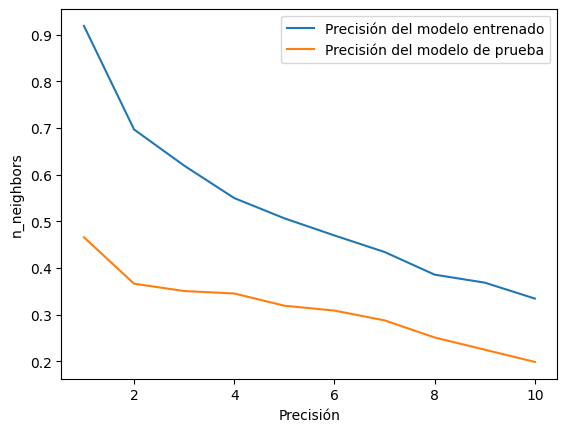

In [ ]:
accuraccy = []
test_accu = []

neigh_config = range (1,11)

for n_neighbors in neigh_config:
      knn_b=KNeighborsClassifier(n_neighbors=n_neighbors)
      knn_b.fit(X_train,y_train)
      accuraccy.append(knn_b.score(X_train,y_train))
      test_accu.append(knn_b.score(X_test,y_test))

plt.plot(neigh_config,accuraccy, label = "Precisión del modelo entrenado")
plt.plot(neigh_config,test_accu, label = "Precisión del modelo de prueba")
plt.xlabel("Precisión")
plt.ylabel("n_neighbors")
plt.legend()
plt.show

***Se puede observar que el mejor KNN es 1, dado que la precisión gráfica nos indica que es el que tienen mayor posibilidades de dar resultados esperados, en cambio entre más vecinos se usen disminuye notablemente el resultado y precisión del modelo***

# **REFERENCIAS**
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing.. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_103

- https://devdocs.io/scikit_learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_133